In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
dict_dtype = {'Item Number':str,
'Bottle Volume (ml)':int,
'Bottles Sold':int,
'State Bottle Retail':float}

In [5]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\item_info_to_cluster.csv',dtype=dict_dtype, index_col=0)

In [6]:
products.rename({'Item Number':'Item_Number', \
              'Item Description':'Item_Description','Bottle Volume (ml)':'Bottle_Volume','State Bottle Retail': 'Bottle_Retail' \
                ,'Bottles Sold':'Bottles_Sold' } ,axis=1, inplace=True)
              

In [7]:
products2 = products.copy()

In [8]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold
count,4475.000000,4475.000000,4.475000e+03
mean,792.361564,31.221806,6.930340e+03
std,410.724957,69.350753,3.972229e+04
min,20.000000,0.990000,1.000000e+00
25%,750.000000,11.799501,5.250000e+01
50%,750.000000,20.250000,5.470000e+02
75%,750.000000,35.000000,3.622000e+03
max,5250.000000,2963.694000,2.105088e+06


In [9]:
products.shape

(4475, 5)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

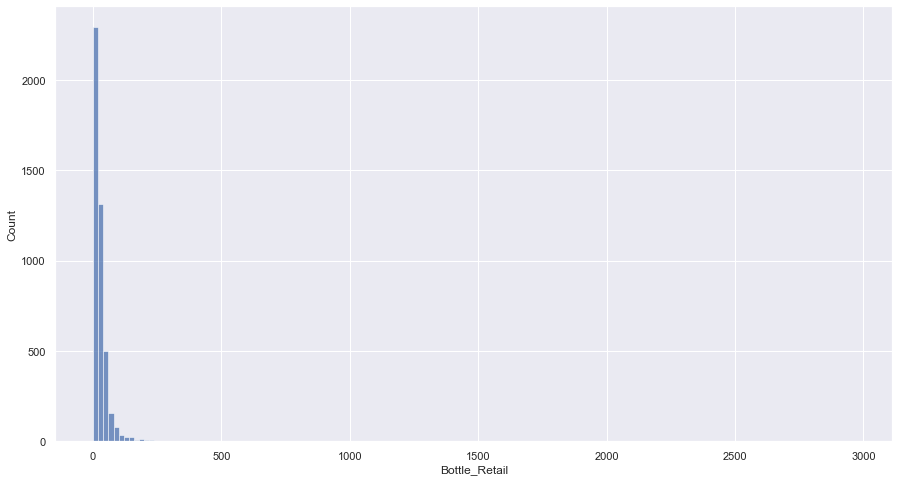

In [10]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


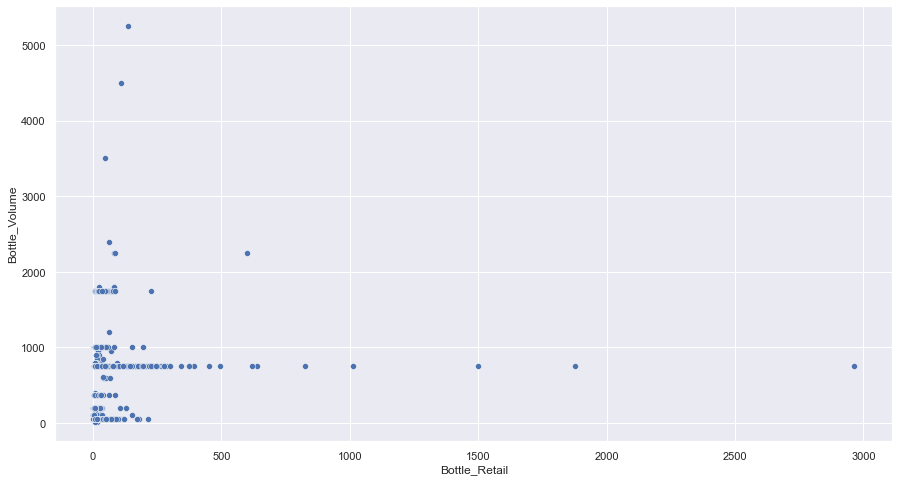

In [11]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [12]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [13]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [14]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [15]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
1636,48725,Remy Martin Louis XIII,750,2963.694,17
3330,917673,HA Double Eagle Very Rare,750,1500.000,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10


In [16]:
filt2 = products.Bottle_Volume > 3000
products[filt2]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,45.0,1123
139,101515,Fireball Cinnamon Whiskey Keg,5250,138.0,180
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,108.0,115


In [17]:
np.sum(products.Bottles_Sold)

31013272

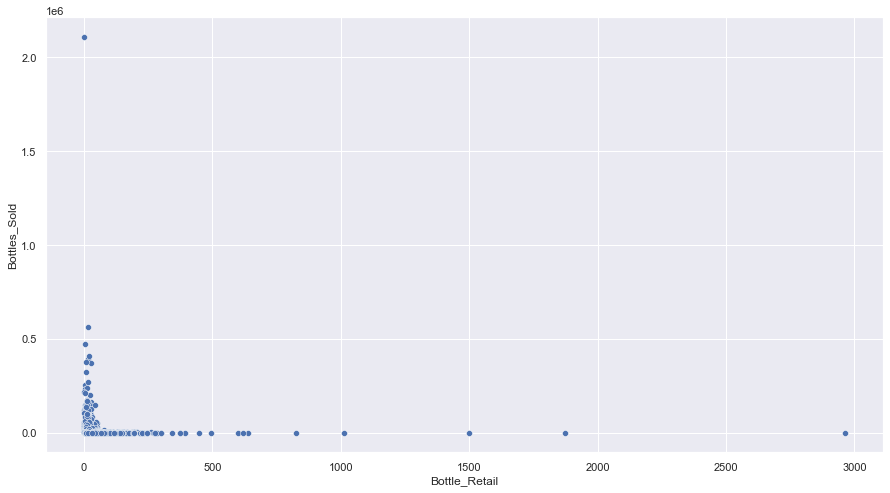

In [18]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

remove outliers

In [19]:
filt = products2.Bottle_Retail > 1400 #drop outliers of Bottle Retail

In [20]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold
1636,48725,Remy Martin Louis XIII,750,2963.694,17
3330,917673,HA Double Eagle Very Rare,750,1500.000,2
3367,919976,HA OFC Bourbon 1995,750,1875.000,10


In [21]:

products2 = products2[~filt]

In [22]:
products2.shape

(4472, 5)

In [23]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [24]:
products2 = products2[~filt2] 

In [25]:
products2.shape

(4469, 5)

scale data for clustering

In [26]:
products2.shape

(4469, 5)

In [27]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

In [28]:
scaler = StandardScaler()

In [29]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,4.469000e+03,4.469000e+03,4.469000e+03
mean,-4.830427e-16,3.983226e-17,-3.902301e-16
std,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.926615e+00,-7.106495e-01,-1.745764e-01
25%,-9.998200e-02,-4.447864e-01,-1.732681e-01
50%,-9.998200e-02,-2.352415e-01,-1.608133e-01
75%,-9.998200e-02,1.288430e-01,-8.324130e-02
max,4.028710e+00,2.425715e+01,5.279193e+01


In [30]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


determine optimal number of clusters

In [31]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]

inertia_scores = []
for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    
#     intertia = model.inertia_
#     inertia_scores.append(inertia)
    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.6390067809820545
number of clusters =  3   silhouette score =  0.6299041668949898
number of clusters =  4   silhouette score =  0.6564156270897895
number of clusters =  5   silhouette score =  0.605241768293715
number of clusters =  6   silhouette score =  0.6203472228999023
number of clusters =  7   silhouette score =  0.6286255966134311
number of clusters =  8   silhouette score =  0.5473655511637903
number of clusters =  9   silhouette score =  0.5455925750634121
number of clusters =  10   silhouette score =  0.5188871925670725


In [32]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

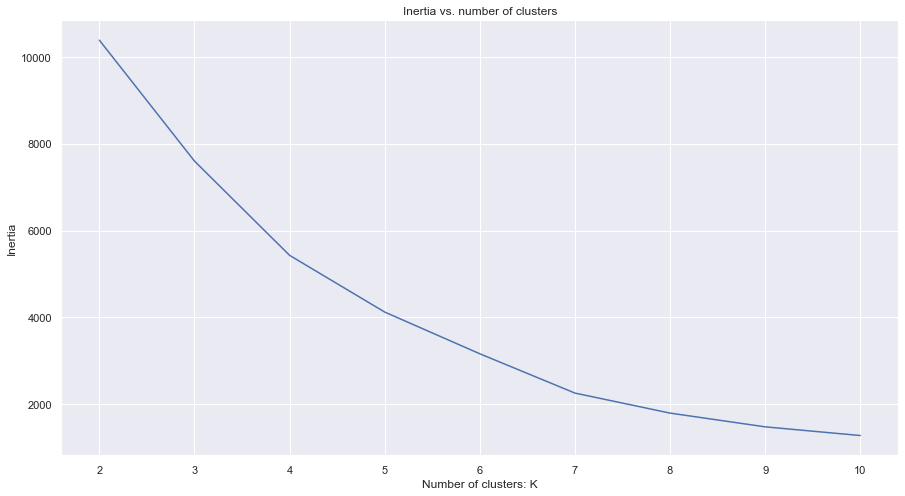

In [33]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get four clusters

In [34]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=3, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [35]:
products2.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,-0.099982,-0.545022,-0.058382,0
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,-0.099982,-0.348046,-0.107195,0
3,10008,Scoresby Rare Scotch,1750,15.75,12340,2.402256,-0.346318,0.135888,1
4,10009,Scoresby Rare Scotch,1000,10.11,1722,0.525577,-0.485534,-0.131274,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,-0.099982,0.286572,-0.159354,0


In [36]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469 entries, 1 to 4474
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4469 non-null   object 
 1   Item_Description      4469 non-null   object 
 2   Bottle_Volume         4469 non-null   int32  
 3   Bottle_Retail         4469 non-null   float64
 4   Bottles_Sold          4469 non-null   int32  
 5   Bottle_Volume_scaled  4469 non-null   float64
 6   Bottle_Retail_scaled  4469 non-null   float64
 7   Bottles_Sold_scaled   4469 non-null   float64
 8   product_cluster       4469 non-null   int32  
dtypes: float64(4), int32(3), object(2)
memory usage: 296.8+ KB


In [37]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

In [38]:
# products2.Bottle_Volume_liters.std()

In [39]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Bottle_Volume_liters,Bottle_Retail,Bottles_Sold
product_cluster,,,
0,0.678986,30.377649,5.736686e+03
1,1.753680,24.661638,1.282591e+04
2,0.100000,1.350000,2.105088e+06


In [40]:
from freq_pd import proc_freq

In [41]:
proc_freq(products2,'product_cluster')

,product_cluster,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,0,4006,89.64,4006,89.64
1,1,462,10.34,4468,99.98
2,2,1,0.02,4469,100.00


In [42]:
products2.loc[products2.product_cluster==2,:]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster,Bottle_Volume_liters
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088,-1.726436,-0.701763,52.791927,2,0.1


In [43]:
products2.loc[products2.product_cluster==2,:]['Bottle_Retail'].min()

1.35

In [44]:
products2.loc[products2.product_cluster==2,:]['Bottle_Retail'].max()

1.35

In [45]:
products2.loc[products2.product_cluster==1,:]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster,Bottle_Volume_liters
3,10008,Scoresby Rare Scotch,1750,15.75,12340,2.402256,-0.346318,0.135888,1,1.75
16,100440,Skyy Vodka 1.75L with Infusion Watermelon 50ml...,1750,22.50,89,2.402256,-0.179703,-0.172362,1,1.75
18,100545,Grey Goose w/2 Martini Glasses,1750,53.13,17,2.402256,0.576358,-0.174174,1,1.75
22,100605,Jameson w/Ginger Ale,1750,43.47,108,2.402256,0.337914,-0.171884,1,1.75
41,100844,Pendleton Canadian Whiskey w/Belt Buckle,1750,37.50,84,2.402256,0.190552,-0.172488,1,1.75
...,...,...,...,...,...,...,...,...,...,...
4319,989292,Kirkland Signature Blended Scotch 3YR,1750,19.76,8712,2.402256,-0.247337,0.044603,1,1.75
4397,994950,Kirkland Signature Irish Whiskey,1750,31.83,3960,2.402256,0.050596,-0.074963,1,1.75
4399,994966,Smirnoff 80prf 1.75L w/Mini Mule Mug Ornament,1750,22.13,55,2.402256,-0.188836,-0.173218,1,1.75
4432,996028,Makers Mark Traypack,1750,45.00,480,2.402256,0.375680,-0.162524,1,1.75


In [46]:
# cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


# model = KMeans(n_clusters=3, random_state=42)

# model.fit(products2[cluster_cols])

# products2['product_cluster_3'] = model.predict(products2[cluster_cols])

In [47]:
# proc_freq(products2,'product_cluster_3')